# Used Car Price Prediction
### Problem Statement : Predict the log-transformed selling price of used cars using selected vehicle and customer features
### By Mowleen Armstrong
#### Step 1: Importing neccessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_car_dataset.csv')

#### Step 2: Intial Data Inspection and Understanding

In [4]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame (columns, non-null counts, data types)
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# Display descriptive statistics for object (categorical) columns
print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include='object'))

# Check for the number of unique values in each column
print("\nNumber of Unique Values per Column:")
print(df.nunique())

First 5 rows of the dataset:
           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       

#### Step 3: Step 3: Handling Missing Values (Preliminary)

In [3]:
# Check for missing values in each column
print("\nMissing Values Count per Column:")
print(df.isnull().sum())

# Calculate the percentage of missing values for each column
print("\nPercentage of Missing Values per Column:")
print((df.isnull().sum() / len(df)) * 100)


Missing Values Count per Column:
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Percentage of Missing Values per Column:
id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer        

#### Step 4: Univariate Analysis of the Target Variable 

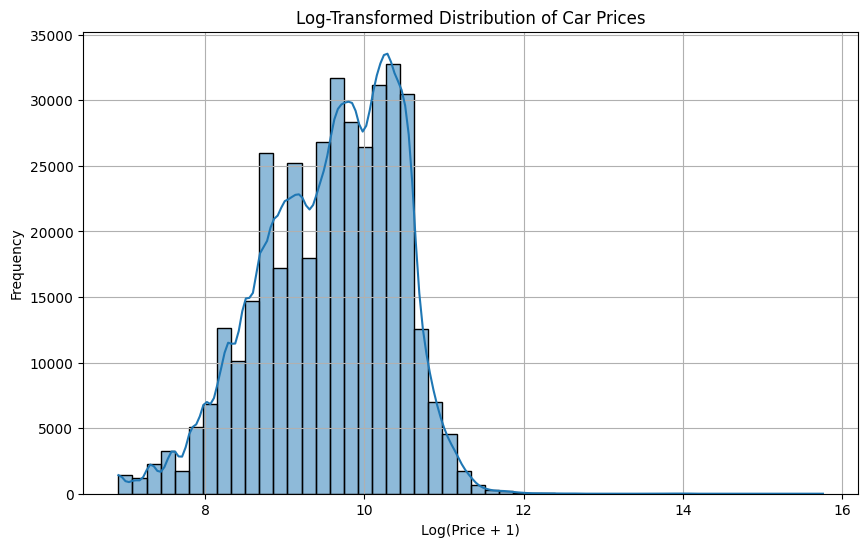


Descriptive Statistics for original 'price':
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Descriptive Statistics for filtered 'price':
count    3.805350e+05
mean     1.969440e+04
std      2.377880e+04
min      1.000000e+03
25%      7.990000e+03
50%      1.599000e+04
75%      2.799000e+04
max      6.995495e+06
Name: price, dtype: float64


In [4]:
filtered_df = df[(df['price'] >= 1000) & (df['price'] <= 1e7)].copy()  

# Log-transform the filtered price safely
filtered_df.loc[:, 'log_price'] = np.log1p(filtered_df['price'])

# Plot the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['log_price'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Car Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Show statistics
print("\nDescriptive Statistics for original 'price':")
print(df['price'].describe())

print("\nDescriptive Statistics for filtered 'price':")
print(filtered_df['price'].describe())

#### Step 5: Handling Outliers in price and Other Numerical Columns

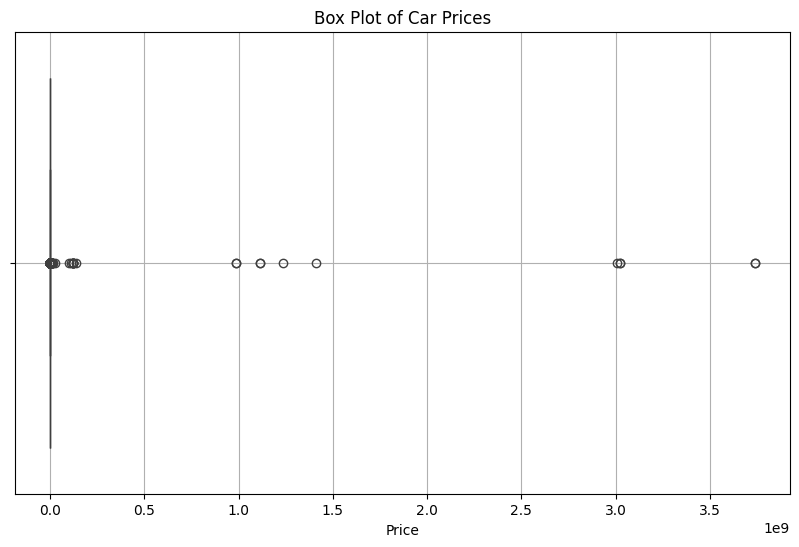

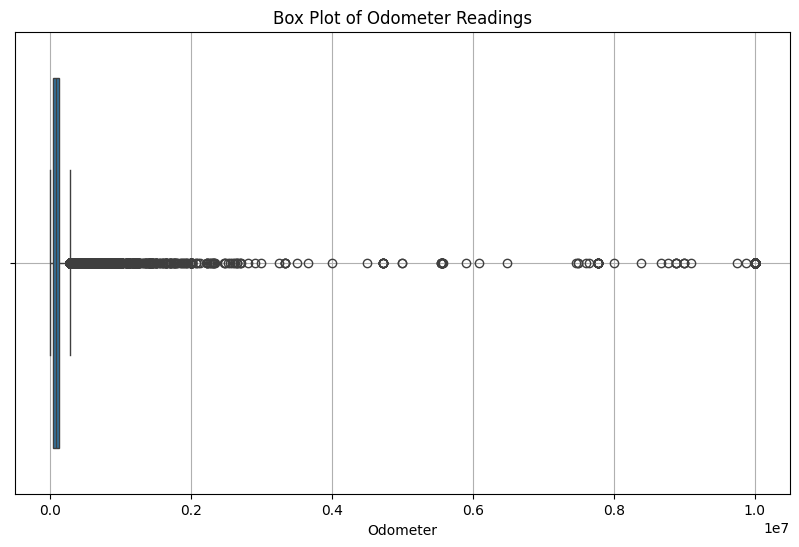

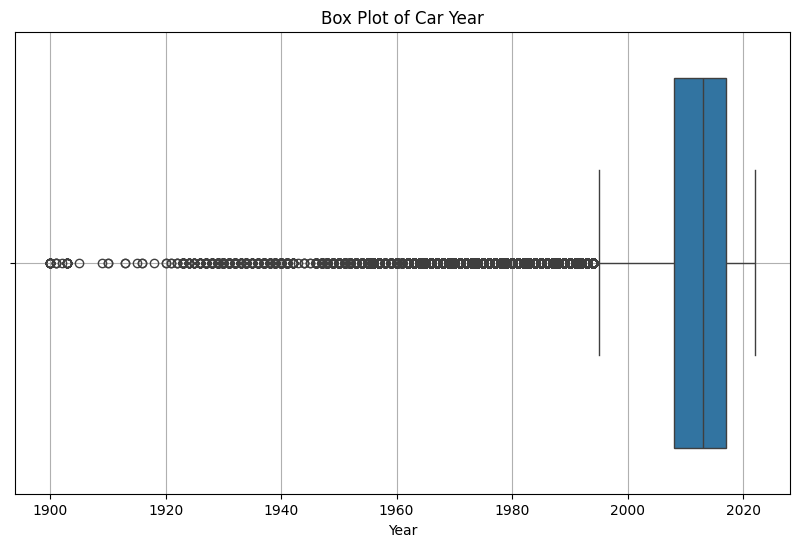


Price Outlier Bounds (IQR Method):
Lower Bound: -24978.625
Upper Bound: 57364.375
Number of prices below lower bound: 0
Number of prices above upper bound: 8177


In [8]:
# Visualize outliers for 'price' using a horizontal box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price']) # Changed 'y' to 'x'
plt.title('Box Plot of Car Prices')
plt.xlabel('Price') # Changed 'ylabel' to 'xlabel'
plt.grid(True)
plt.show()

# Visualize outliers for 'odometer' using a horizontal box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer']) # Changed 'y' to 'x'
plt.title('Box Plot of Odometer Readings')
plt.xlabel('Odometer') # Changed 'ylabel' to 'xlabel'
plt.grid(True)
plt.show()

# Visualize outliers for 'year' using a horizontal box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['year']) # Changed 'y' to 'x'
plt.title('Box Plot of Car Year')
plt.xlabel('Year') # Changed 'ylabel' to 'xlabel'
plt.grid(True)
plt.show()

# ---
# Optional: Identify specific values that are potential outliers (e.g., using IQR method for 'price')
# This part remains the same as it's not dependent on plot orientation
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

print(f"\nPrice Outlier Bounds (IQR Method):")
print(f"Lower Bound: {lower_bound_price}")
print(f"Upper Bound: {upper_bound_price}")
print(f"Number of prices below lower bound: {df[df['price'] < lower_bound_price].shape[0]}")
print(f"Number of prices above upper bound: {df[df['price'] > upper_bound_price].shape[0]}")

#### Step 6: Feature Engineering

In [9]:
# 1. Create 'age' from 'year'
# Assuming the current year is 2025 for calculation purposes.
# You might want to get the actual current year or consider the posting_date if available.
df['age'] = 2025 - df['year']
print("\n'age' column created. First 5 values:")
print(df['age'].head())

# 2. Extract 'region_category' from 'region' (e.g., city/state or major metro area)
df['is_sf_bay_area'] = df['region'].apply(lambda x: 1 if 'sf bay area' in str(x).lower() else 0)
print("\n'is_sf_bay_area' column created. First 5 values:")
print(df['is_sf_bay_area'].head())


# 3. Simplify 'condition' into numerical scale 
condition_mapping = {
    'new': 5,
    'excellent': 4,
    'good': 3,
    'fair': 2,
    'salvage': 1,
    'lien': 0 # Added 'lien' based on common Craigslist conditions
}
df['condition_numeric'] = df['condition'].map(condition_mapping)
print("\n'condition_numeric' column created. First 5 values:")
print(df['condition_numeric'].head())
print("Value counts for 'condition_numeric':")
print(df['condition_numeric'].value_counts(dropna=False)) # Check how many NaNs might have resulted

# 4. Binary feature for 'VIN' presence (if VIN is a strong indicator of legitimacy/detailed history)
df['has_vin'] = df['VIN'].apply(lambda x: 1 if pd.notna(x) else 0)
print("\n'has_vin' column created. First 5 values:")
print(df['has_vin'].head())

# Display the columns and their types after feature engineering
print("\nDataFrame Info after Feature Engineering:")
df.info()


'age' column created. First 5 values:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: age, dtype: float64

'is_sf_bay_area' column created. First 5 values:
0    0
1    0
2    0
3    0
4    0
Name: is_sf_bay_area, dtype: int64

'condition_numeric' column created. First 5 values:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: condition_numeric, dtype: float64
Value counts for 'condition_numeric':
condition_numeric
NaN    195282
3.0    121456
4.0    101467
2.0      6769
5.0      1305
1.0       601
Name: count, dtype: int64

'has_vin' column created. First 5 values:
0    0
1    0
2    0
3    0
4    0
Name: has_vin, dtype: int64

DataFrame Info after Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 426880 non-null  int64  
 1   url                426880 non-null  object 
 2   region         

#### Step 7: Bivariate Analysis (Numerical Features vs. Price)

In [11]:
import re # Import regular expression module

# Function to clean and convert 'cylinders'
def clean_cylinders(value):
    if pd.isna(value):
        return np.nan # Keep NaN if missing
    try:
        # Try to convert directly to float if it's already a number
        return float(value)
    except ValueError:
        # If it's a string like '8 cylinders', extract the number
        match = re.search(r'(\d+)', str(value))
        if match:
            return float(match.group(1))
        else:
            return np.nan # If no number found, treat as NaN or another placeholder
            # You might also consider returning a mode/median based on EDA for imputation
            # For now, let's keep it NaN to see how many fail conversion
            # print(f"Warning: Could not convert '{value}' in 'cylinders'") # Uncomment to see problematic values
            # return np.nan # Return NaN if unable to parse
            # Alternatively, you could return a common value like df['cylinders'].mode()[0] if you want to impute immediately.

# Apply the cleaning function to the 'cylinders' column
df['cylinders_cleaned'] = df['cylinders'].apply(clean_cylinders)

# Check the new 'cylinders_cleaned' column info and value counts
print("\nInfo for 'cylinders_cleaned' after cleaning:")
df['cylinders_cleaned'].info()
print("\nValue Counts for 'cylinders_cleaned':")
print(df['cylinders_cleaned'].value_counts(dropna=False))

# Drop the original 'cylinders' column if you wish, or keep it for comparison
# df = df.drop('cylinders', axis=1) # You can uncomment this line if you want to remove the original column


Info for 'cylinders_cleaned' after cleaning:
<class 'pandas.core.series.Series'>
RangeIndex: 426880 entries, 0 to 426879
Series name: cylinders_cleaned
Non-Null Count   Dtype  
--------------   -----  
247904 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB

Value Counts for 'cylinders_cleaned':
cylinders_cleaned
NaN     178976
6.0      94169
4.0      77642
8.0      72062
5.0       1712
10.0      1455
3.0        655
12.0       209
Name: count, dtype: int64


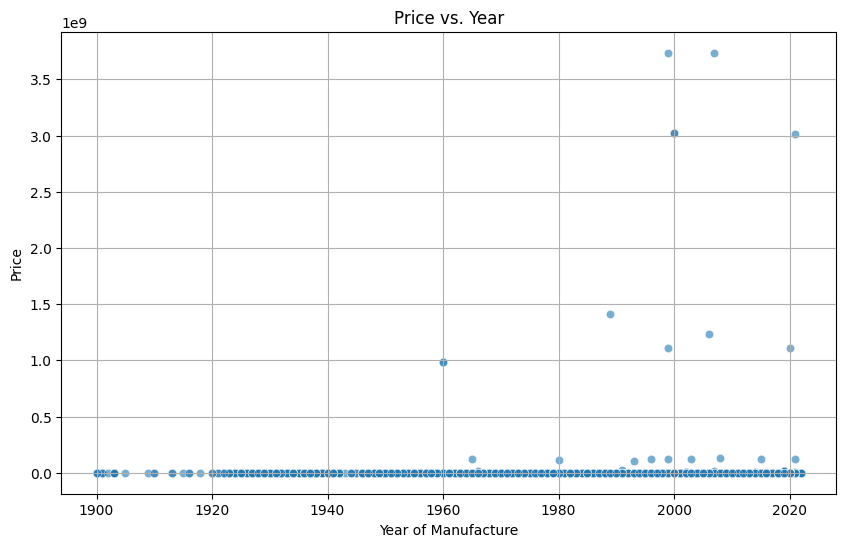

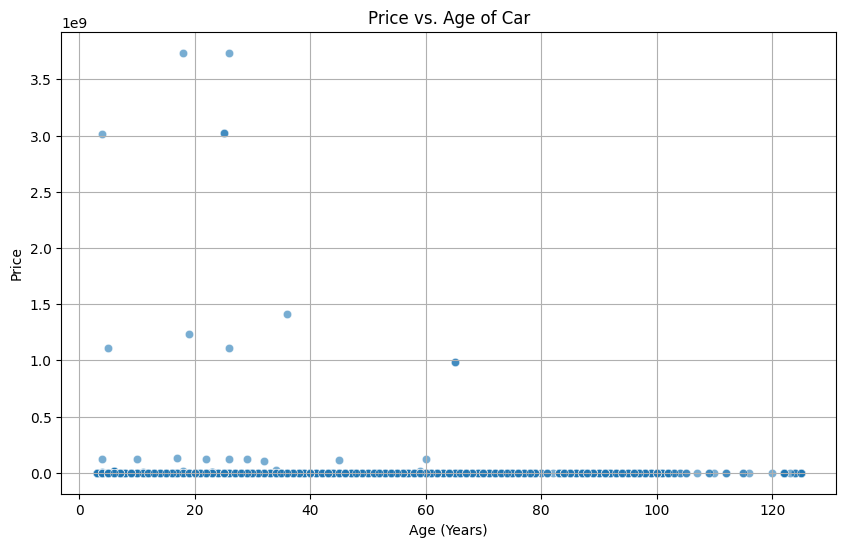

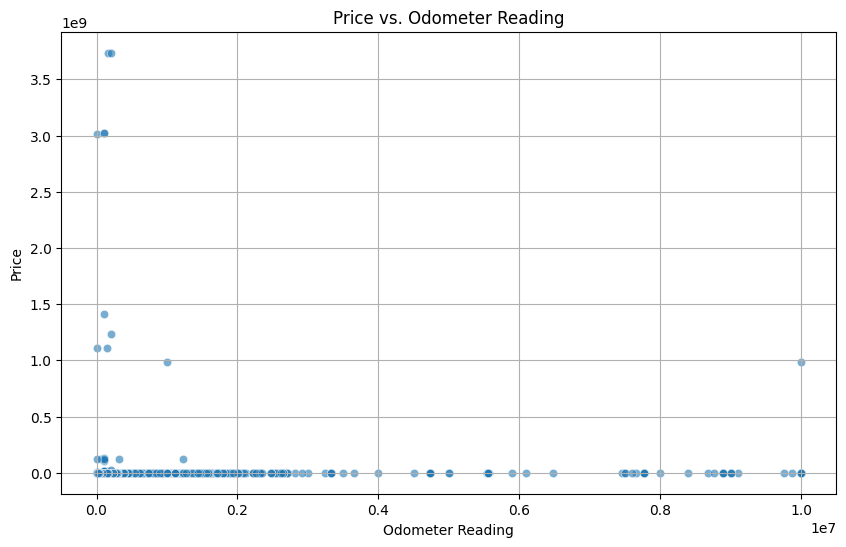

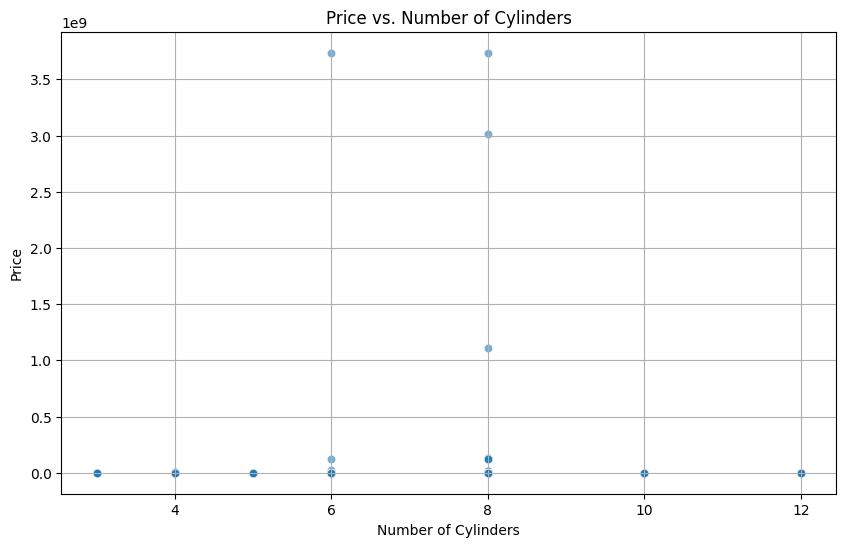


Correlation Matrix (selected numerical features with price):
price                1.000000
odometer             0.010032
age                  0.004925
cylinders_cleaned    0.003878
condition_numeric   -0.003820
year                -0.004925
Name: price, dtype: float64


In [13]:
# Scatter plot: Price vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df, alpha=0.6)
plt.title('Price vs. Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Scatter plot: Price vs. Age (newly engineered feature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=df, alpha=0.6)
plt.title('Price vs. Age of Car')
plt.xlabel('Age (Years)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Scatter plot: Price vs. Odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.6)
plt.title('Price vs. Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Scatter plot: Price vs. Cylinders (using the CLEANED column)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cylinders_cleaned', y='price', data=df, alpha=0.6)
plt.title('Price vs. Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Calculate Pearson correlation coefficients for key numerical features with 'price'
# IMPORTANT: Use 'cylinders_cleaned' here!
numerical_cols_for_corr = ['price', 'year', 'age', 'odometer', 'cylinders_cleaned', 'condition_numeric']
print("\nCorrelation Matrix (selected numerical features with price):")
print(df[numerical_cols_for_corr].corr()['price'].sort_values(ascending=False))

#### Step 8: Bivariate Analysis (Categorical Features vs. Price)


Analyzing 'manufacturer' vs. price:


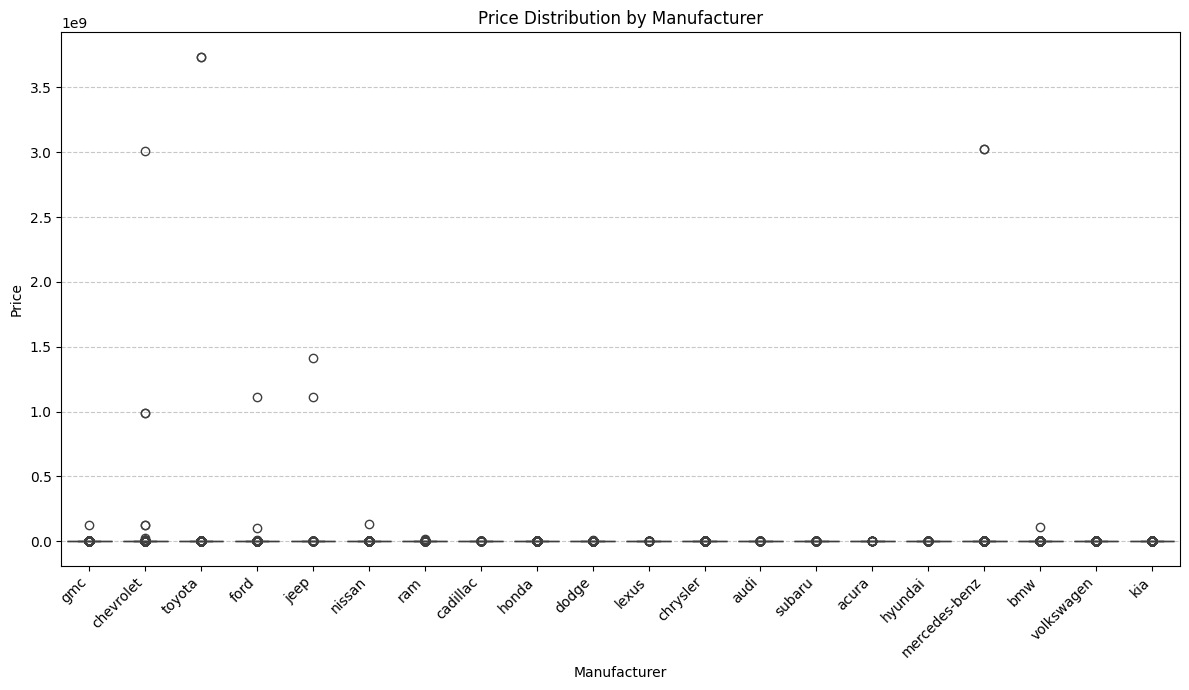


Analyzing 'condition' vs. price:


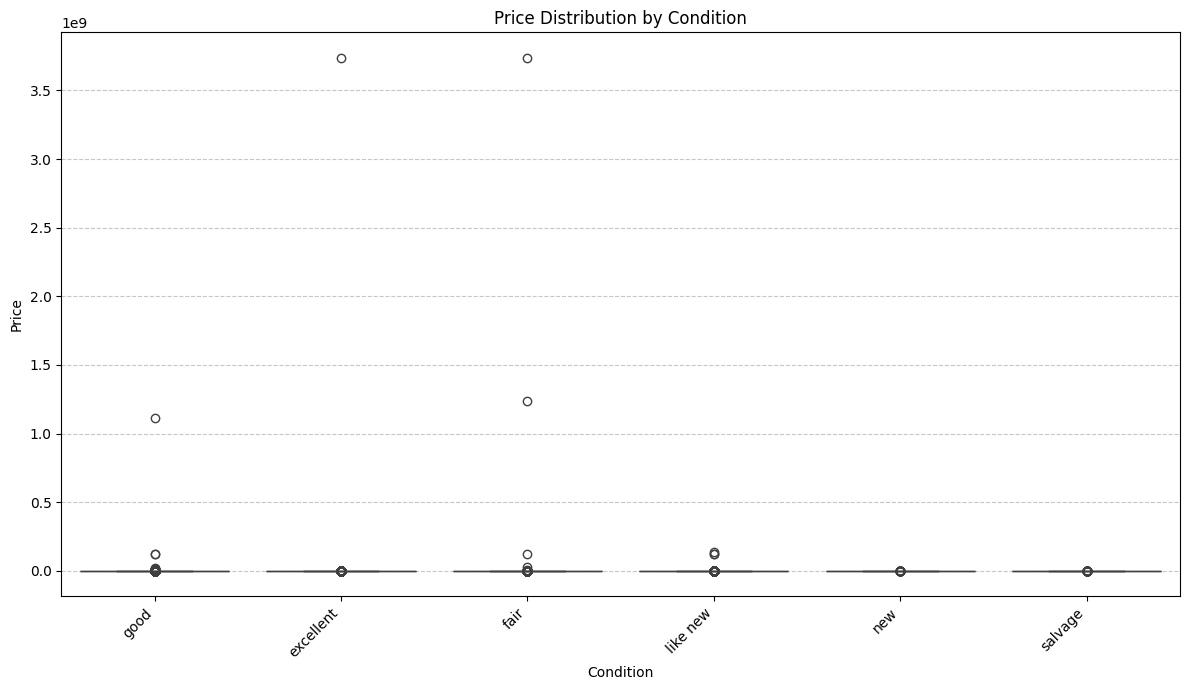


Analyzing 'fuel' vs. price:


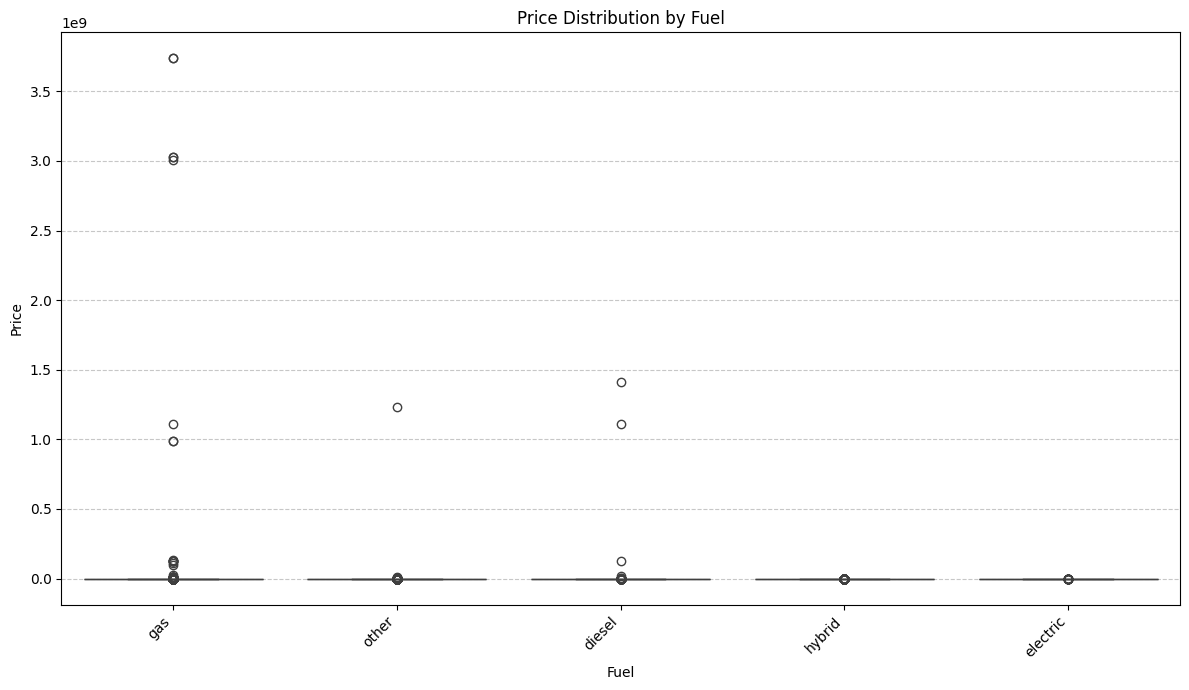


Analyzing 'transmission' vs. price:


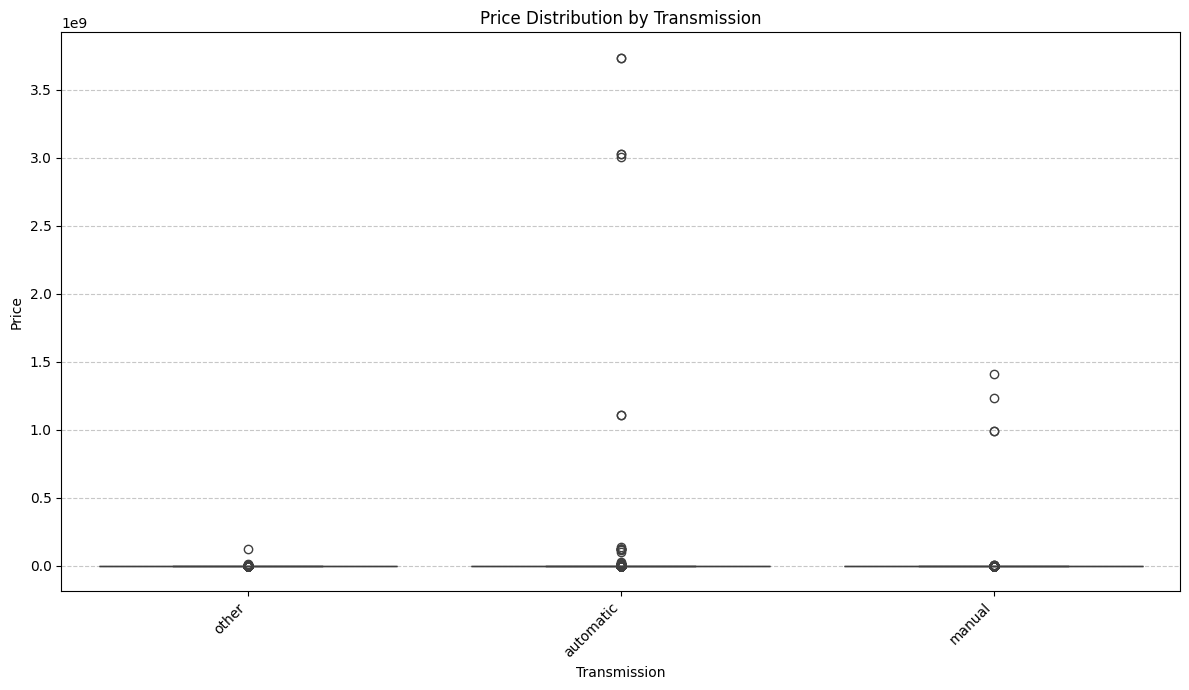


Analyzing 'type' vs. price:


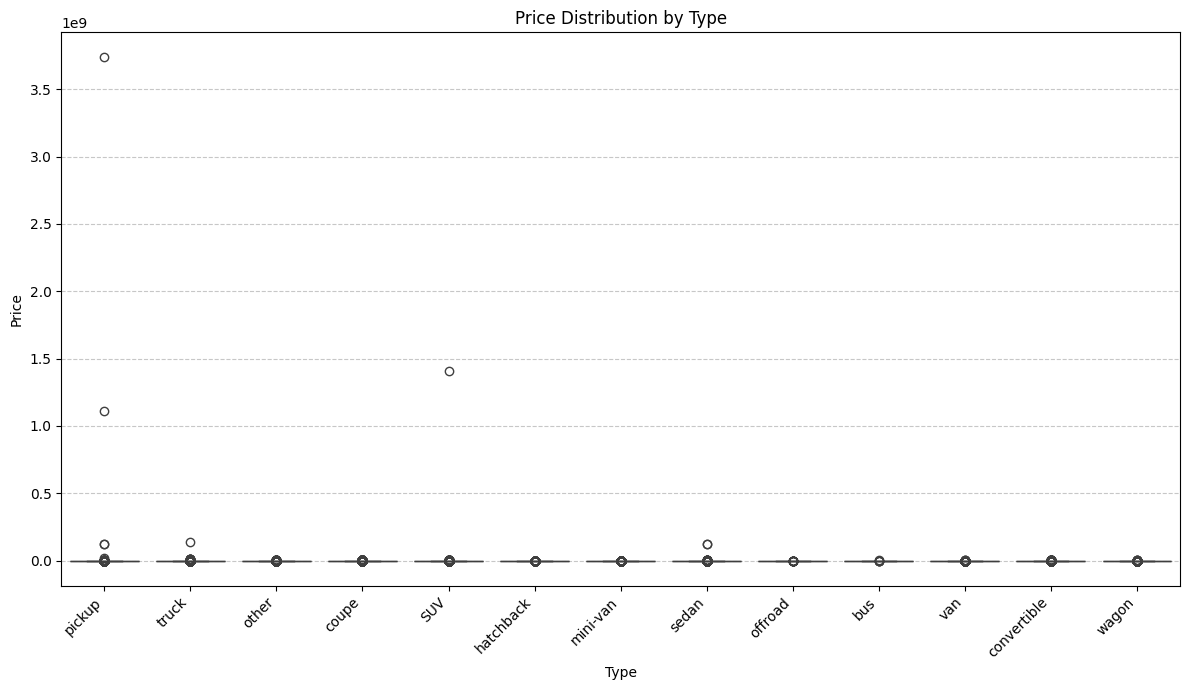


Analyzing 'drive' vs. price:


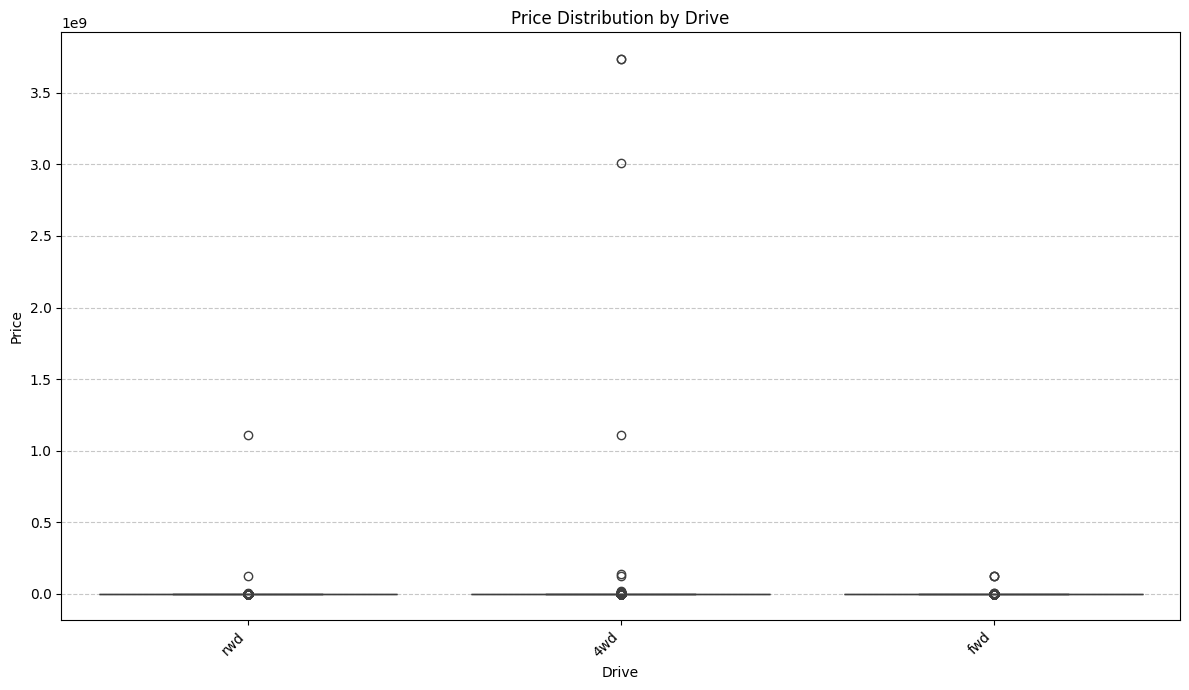


Analyzing 'paint_color' vs. price:


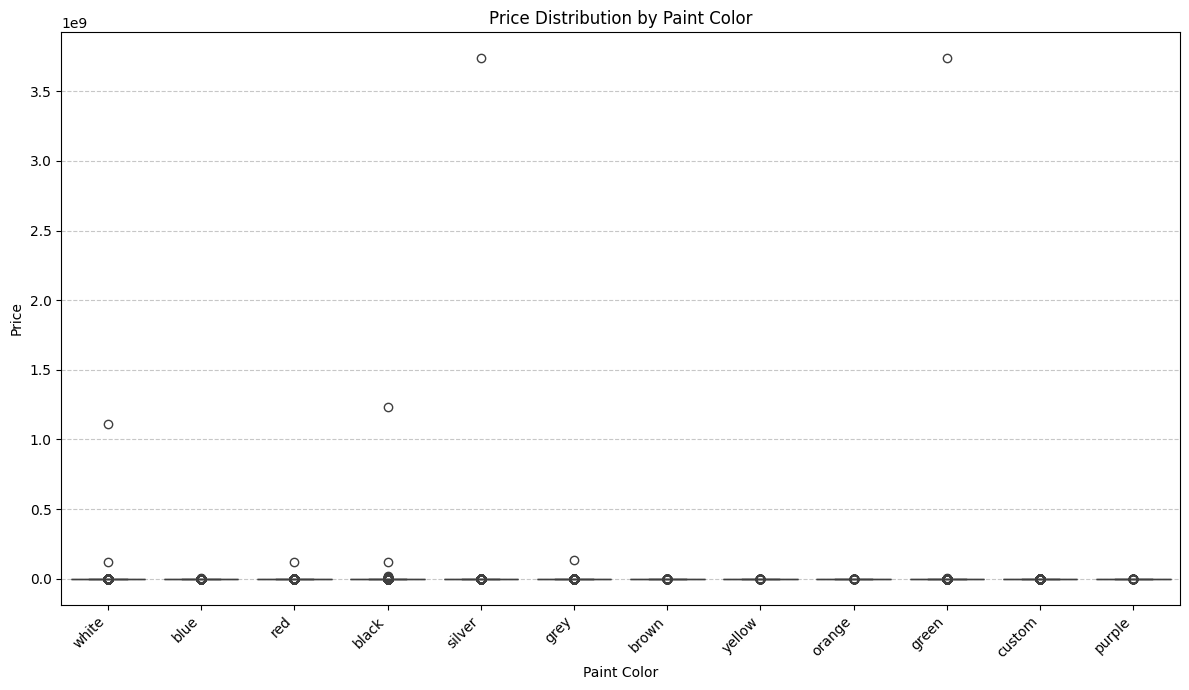

In [14]:
# Function to create box plots for categorical features vs. price
def plot_categorical_vs_price(df, column):
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'Price Distribution by {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Analyze 'manufacturer' vs. price
print("\nAnalyzing 'manufacturer' vs. price:")
top_manufacturers = df['manufacturer'].value_counts().nlargest(20).index
plot_categorical_vs_price(df[df['manufacturer'].isin(top_manufacturers)], 'manufacturer')


# Analyze 'condition' vs. price (using the cleaned numerical 'condition_numeric')
print("\nAnalyzing 'condition' vs. price:")
plot_categorical_vs_price(df, 'condition') # Use original 'condition' for better labels


# Analyze 'fuel' vs. price
print("\nAnalyzing 'fuel' vs. price:")
plot_categorical_vs_price(df, 'fuel')


# Analyze 'transmission' vs. price
print("\nAnalyzing 'transmission' vs. price:")
plot_categorical_vs_price(df, 'transmission')


# Analyze 'type' vs. price
print("\nAnalyzing 'type' vs. price:")
plot_categorical_vs_price(df, 'type')


# Analyze 'drive' vs. price
print("\nAnalyzing 'drive' vs. price:")
plot_categorical_vs_price(df, 'drive')

# Analyze 'paint_color' vs. price
print("\nAnalyzing 'paint_color' vs. price:")
top_colors = df['paint_color'].value_counts().nlargest(15).index
plot_categorical_vs_price(df[df['paint_color'].isin(top_colors)], 'paint_color')

#### Step 9: Correlation Heatmap and Feature Selection Considerations

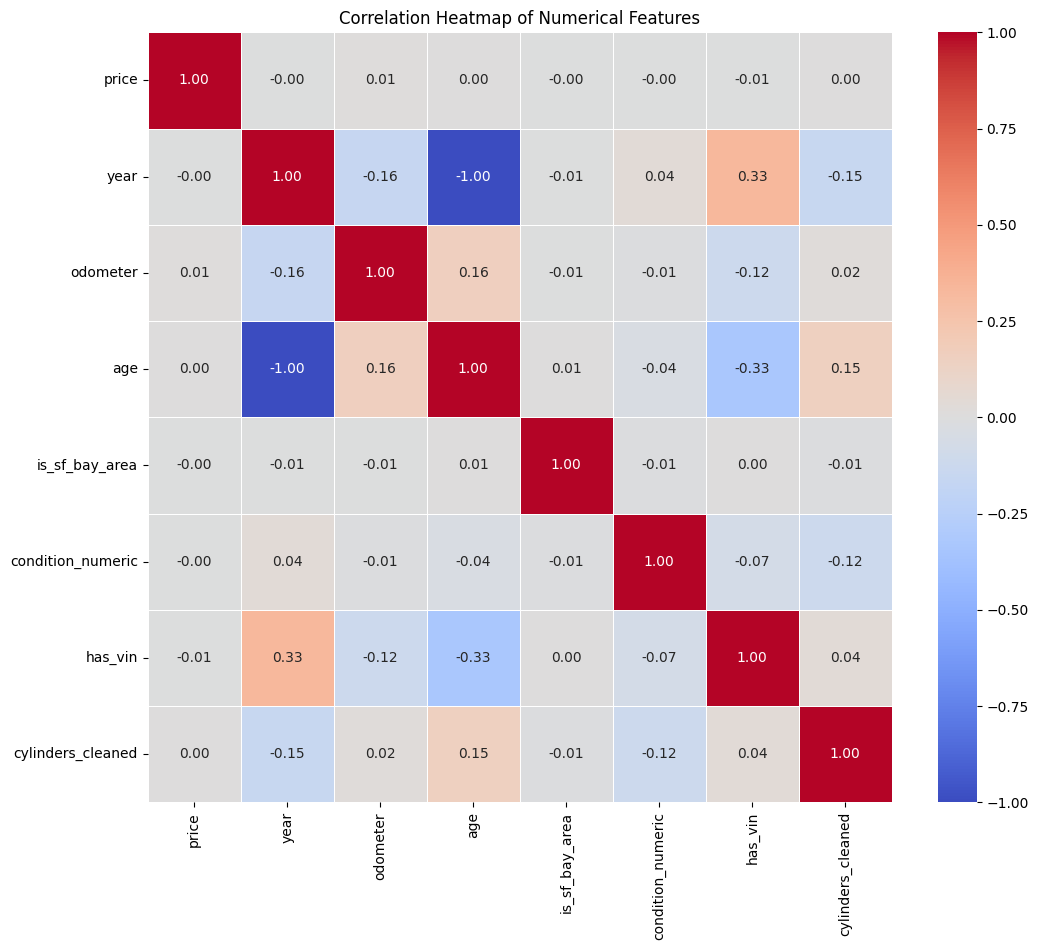


Top correlations with Price:
price                1.000000
odometer             0.010032
age                  0.004925
cylinders_cleaned    0.003878
is_sf_bay_area      -0.000397
condition_numeric   -0.003820
year                -0.004925
has_vin             -0.005701
Name: price, dtype: float64


In [15]:
# Select only numerical columns for the correlation heatmap
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude 'id', 'lat', 'long' if they are present and not truly numerical features for correlation
features_to_exclude = ['id', 'lat', 'long', 'url', 'region_url', 'image_url', 'VIN', 'county'] # Add other non-numeric/identifier columns if needed
numerical_features = [col for col in numerical_features if col not in features_to_exclude]

# Create the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

print("\nTop correlations with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))

#### Step 10: Handling Remaining Missing Values and Data Transformation

In [32]:
# --- REVISED SECTION FOR STEP 10.1: Handling Missing Values ---

print("Missing values before imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0]) # Show only columns with NaNs

# --- Numerical Imputation ---
# Example: Imputing 'odometer' and 'cylinders_cleaned' with their medians/modes
if 'odometer' in df.columns and df['odometer'].isnull().any():
    median_odometer = df['odometer'].median()
    df['odometer'] = df['odometer'].fillna(median_odometer)
    print(f"\n'odometer' missing values filled with median: {median_odometer}")

if 'cylinders_cleaned' in df.columns and df['cylinders_cleaned'].isnull().any():
    mode_cylinders = df['cylinders_cleaned'].mode()[0]
    df['cylinders_cleaned'] = df['cylinders_cleaned'].fillna(mode_cylinders)
    print(f"\n'cylinders_cleaned' missing values filled with mode: {mode_cylinders}")

if 'condition_numeric' in df.columns and df['condition_numeric'].isnull().any():
    mode_condition_numeric = df['condition_numeric'].mode()[0]
    df['condition_numeric'] = df['condition_numeric'].fillna(mode_condition_numeric)
    print(f"\n'condition_numeric' missing values filled with mode: {mode_condition_numeric}")

# ADDED THIS BLOCK FOR 'age' IMPUTATION
if 'age' in df.columns and df['age'].isnull().any():
    median_age = df['age'].median()
    df['age'] = df['age'].fillna(median_age)
    print(f"\n'age' missing values filled with median: {median_age}")


# --- Categorical Imputation / Dropping (no changes here) ---
if 'paint_color' in df.columns and df['paint_color'].isnull().any():
    mode_paint_color = df['paint_color'].mode()[0]
    df['paint_color'] = df['paint_color'].fillna(mode_paint_color)
    print(f"\n'paint_color' missing values filled with mode: {mode_paint_color}")

# Example: Dropping columns with a very high percentage of missing values (no change here)
cols_to_drop_if_too_many_nans = []

if 'VIN' in df.columns:
    vin_nan_percentage = (df['VIN'].isnull().sum() / len(df)) * 100
    if vin_nan_percentage > 70:
        cols_to_drop_if_too_many_nans.append('VIN')
        print(f"\n'VIN' has {vin_nan_percentage:.2f}% missing values, marked for dropping.")

if 'county' in df.columns:
    county_nan_percentage = (df['county'].isnull().sum() / len(df)) * 100
    if county_nan_percentage > 70:
        cols_to_drop_if_too_many_nans.append('county')
        print(f"\n'county' has {county_nan_percentage:.2f}% missing values, marked for dropping.")

if cols_to_drop_if_too_many_nans:
    df.drop(columns=cols_to_drop_if_too_many_nans, inplace=True)
    print(f"\nDropped columns: {cols_to_drop_if_too_many_nans}")

# Verify remaining missing values
print("\nMissing values after imputation/dropping:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# --- End of REVISED SECTION FOR STEP 10.1 ---

Missing values before imputation:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
image_url           68
description         70
lat               6549
long              6549
posting_date        68
age               1205
dtype: int64

'age' missing values filled with median: 12.0

Missing values after imputation/dropping:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
image_url           68
description         70
lat               6549
long              6549
posting_date        68
dtype: int64



Original vs. Log Transformed Price (first 5 values):
   price  price_log
0   6000   8.699681
1  11900   9.384378
2  21000   9.952325
3   1500   7.313887
4   4900   8.497195

Original vs. Log Transformed Odometer (first 5 values):
   odometer  odometer_log
0   85548.0     11.356845
1   85548.0     11.356845
2   85548.0     11.356845
3   85548.0     11.356845
4   85548.0     11.356845


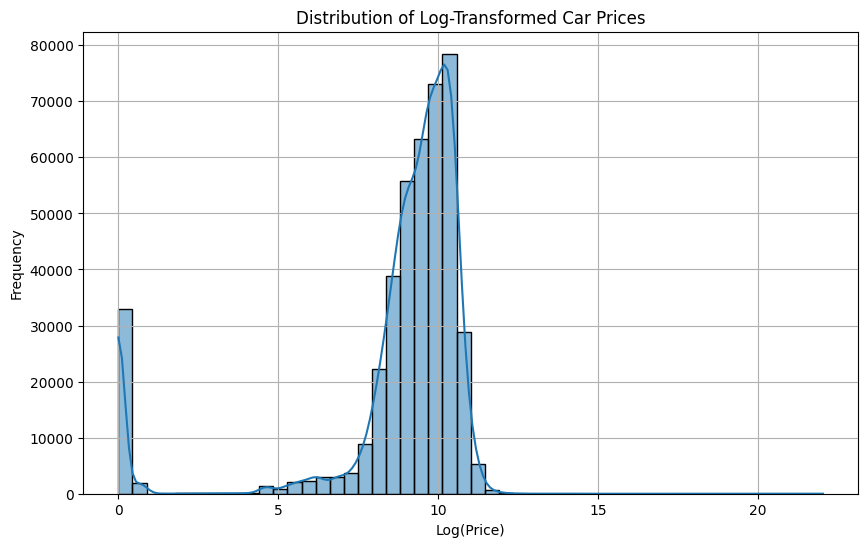

In [33]:
# Log Transform highly skewed numerical features: 'price' and 'odometer'
# We'll create new columns for the transformed versions to preserve original data
# Add 1 to avoid log(0) issues, although prices/odometers are unlikely to be 0
df['price_log'] = np.log1p(df['price']) # log1p is log(1+x)
df['odometer_log'] = np.log1p(df['odometer'])

print("\nOriginal vs. Log Transformed Price (first 5 values):")
print(df[['price', 'price_log']].head())

print("\nOriginal vs. Log Transformed Odometer (first 5 values):")
print(df[['odometer', 'odometer_log']].head())

# Plot distribution of transformed 'price_log'
plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Step 11: Encoding Categorical Features

In [34]:
# Identify categorical columns to be one-hot encoded
# Exclude columns that are identifiers or already handled (like region_url, VIN, image_url, url, description, region, county)
# Also exclude 'condition' since we already have 'condition_numeric'
# 'model' can have very high cardinality, so we'll decide on that later or simplify it.
# For now, let's focus on: manufacturer, fuel, transmission, drive, type, paint_color, title_status, is_sf_bay_area

categorical_cols_to_encode = [
    'manufacturer',
    'fuel',
    'transmission',
    'drive',
    'type',
    'paint_color',
    'title_status',
    'is_sf_bay_area' # Our engineered binary categorical feature
]

# Ensure only columns present in the DataFrame are selected for encoding
categorical_cols_to_encode = [col for col in categorical_cols_to_encode if col in df.columns]

print(f"\nCategorical columns selected for One-Hot Encoding: {categorical_cols_to_encode}")

# Perform One-Hot Encoding
# drop_first=True helps to avoid multicollinearity (n-1 dummy variables)
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print("\nShape of DataFrame after One-Hot Encoding:")
print(df_encoded.shape)

print("\nFirst 5 rows of the encoded DataFrame (showing some new columns):")
print(df_encoded.head())

# Display new columns created by encoding
print("\nNew columns created by One-Hot Encoding (first 10 examples):")
new_cols = [col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_cols_to_encode)]
print(new_cols[:10]) # Print first 10 for brevity


Categorical columns selected for One-Hot Encoding: ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'title_status', 'is_sf_bay_area']

Shape of DataFrame after One-Hot Encoding:
(426880, 102)

First 5 rows of the encoded DataFrame (showing some new columns):
           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   

#### Step 12: Feature Selection (Final Review) and Model Preparation

In [38]:
from sklearn.model_selection import train_test_split

# 1. Drop Irrelevant and Redundant Columns
# Ensure 'price_log' is explicitly in this list to be dropped from X
columns_to_drop_final = [
    'id', 'url', 'region_url', 'image_url', 'description', 'VIN', # Identifiers/text
    'region', 'posting_date', # These were not used or processed for direct feature input
    'county', # Likely dropped due to high NaN, but ensure if it exists
    'price', # Original price, we use price_log as target
    'price_log', # <--- CRITICAL ADDITION: Ensure this is removed from X!
    'year', # 'age' was engineered from this
    'odometer', # 'odometer_log' was engineered from this
    'cylinders', # 'cylinders_cleaned' was used
    'condition', # 'condition_numeric' was used
    'model', # Often too high cardinality for simple one-hot encoding without further processing/grouping
    'size', # Often many NaNs and too varied. Keep if you think it's useful and cleaned.
    'lat', 'long', # Geographic coordinates can be useful but often require more advanced spatial features
    'state' # Addressed in previous debug
]

# Filter columns that actually exist in the DataFrame before dropping
columns_to_drop_final = [col for col in columns_to_drop_final if col in df_encoded.columns]

print(f"\nFinal columns to be dropped from X: {columns_to_drop_final}")

# Create the final feature set X
# IMPORTANT: 'errors='ignore' is crucial here in case some columns were already dropped (e.g. by high NaN % earlier)
X = df_encoded.drop(columns=columns_to_drop_final, errors='ignore')
y = df_encoded['price_log'] # Our target variable

print(f"\nShape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

print("\nFirst 5 rows of X (features) after final drop:")
print(X.head())
print(f"Checking for 'price_log' in X columns: {'price_log' in X.columns}") # Should be False

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Final check: Ensure no missing values remain in X_train/y_train
print("\nMissing values in X_train after final preparation:")
print(X_train.isnull().sum().sum())
print("\nMissing values in y_train after final preparation:")
print(y_train.isnull().sum())


Final columns to be dropped from X: ['id', 'url', 'region_url', 'image_url', 'description', 'VIN', 'region', 'posting_date', 'price', 'price_log', 'year', 'odometer', 'cylinders', 'condition', 'model', 'size', 'lat', 'long', 'state']

Shape of X (features): (426880, 83)
Shape of y (target): (426880,)

First 5 rows of X (features) after final drop:
    age  condition_numeric  has_vin  cylinders_cleaned  odometer_log  \
0  12.0                3.0        0                6.0     11.356845   
1  12.0                3.0        0                6.0     11.356845   
2  12.0                3.0        0                6.0     11.356845   
3  12.0                3.0        0                6.0     11.356845   
4  12.0                3.0        0                6.0     11.356845   

   manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
0                    False                      False              False   
1                    False                      False           

#### Step 13: Model Training - Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Already imported, but good to ensure

# 1. Instantiate the Linear Regression Model
linear_model = LinearRegression()

# --- INSERT THIS CODE RIGHT BEFORE linear_model.fit(X_train, y_train) ---
print("\n--- CRITICAL DEBUG: Final NaN check on X_train and y_train before Model Fit ---")

# Check for NaNs in X_train
nan_in_X_train = X_train.isnull().sum()
nan_in_X_train = nan_in_X_train[nan_in_X_train > 0]

if not nan_in_X_train.empty:
    print("\nERROR: NaN values found in X_train columns:")
    print(nan_in_X_train)
    print(f"Total NaN count in X_train: {X_train.isnull().sum().sum()}")
    # Optionally, to see rows with NaNs in X_train:
    # print("\nRows in X_train with NaNs (first 5):")
    # print(X_train[X_train.isnull().any(axis=1)].head())
    # THIS IS THE SOURCE OF THE PROBLEM! The model cannot train with these.
else:
    print("\nSUCCESS: No NaN values found in X_train. Proceeding with training.")

# Check for NaNs in y_train
nan_in_y_train = y_train.isnull().sum()
if nan_in_y_train > 0:
    print(f"\nERROR: NaN values found in y_train: {nan_in_y_train}")
    # THIS IS THE SOURCE OF THE PROBLEM! The model cannot train with these.
else:
    print("SUCCESS: No NaN values found in y_train.")

print("\n--- End CRITICAL DEBUG ---")
# --- END OF INSERTED CODE ---

# linear_model.fit(X_train, y_train) # This line will now be executed after the debug checks
# 2. Train the Model
# X_train and y_train were created in Step 12
print("Training Linear Regression model...")
linear_model.fit(X_train, y_train)
print("Linear Regression model training complete.")

# 3. Make Predictions on the Test Set
print("Making predictions on the test set...")
y_pred_linear = linear_model.predict(X_test)
print("Predictions complete.")

# 4. Evaluate the Model's Performance
print("\n--- Linear Regression Model Evaluation ---")

# Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error (MAE): {mae_linear:.4f}")

# Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")

# Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.4f}")

# R-squared (R2)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R-squared (R2): {r2_linear:.4f}")

# --- Important: Inverse Transform Predictions ---
# Since we trained on price_log, our predictions are in log scale.
# To understand the error in actual currency, we need to inverse transform them.
y_test_actual = np.expm1(y_test)
y_pred_linear_actual = np.expm1(y_pred_linear)

mae_linear_actual = mean_absolute_error(y_test_actual, y_pred_linear_actual)
rmse_linear_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_linear_actual))

print(f"\n--- Linear Regression Model Evaluation (Actual Price Scale) ---")
print(f"Mean Absolute Error (MAE - Actual Price): ${mae_linear_actual:.2f}")
print(f"Root Mean Squared Error (RMSE - Actual Price): ${rmse_linear_actual:.2f}")


--- CRITICAL DEBUG: Final NaN check on X_train and y_train before Model Fit ---

SUCCESS: No NaN values found in X_train. Proceeding with training.
SUCCESS: No NaN values found in y_train.

--- End CRITICAL DEBUG ---
Training Linear Regression model...
Linear Regression model training complete.
Making predictions on the test set...
Predictions complete.

--- Linear Regression Model Evaluation ---
Mean Absolute Error (MAE): 1.6232
Mean Squared Error (MSE): 7.1830
Root Mean Squared Error (RMSE): 2.6801
R-squared (R2): 0.0591

--- Linear Regression Model Evaluation (Actual Price Scale) ---
Mean Absolute Error (MAE - Actual Price): $141618.30
Root Mean Squared Error (RMSE - Actual Price): $19785884.46


#### Step 14:  Model Training & Evaluation - K-Nearest Neighbors (KNN) Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Ensure numpy is imported

print("\n--- Training K-Nearest Neighbors (KNN) Regressor ---")

# 1. Instantiate the KNN Regressor Model
# n_neighbors is a hyperparameter (how many nearest neighbors to consider)
# A common starting point is 5 or 7.
knn_model = KNeighborsRegressor(n_neighbors=5)

# 2. Train the Model
# X_train and y_train were created in Step 12
print("Training KNN Regressor model...")
knn_model.fit(X_train, y_train)
print("KNN Regressor model training complete.")

# 3. Make Predictions on the Test Set
print("Making predictions on the test set...")
y_pred_knn = knn_model.predict(X_test)
print("Predictions complete.")

# 4. Evaluate the Model's Performance
print("\n--- KNN Regressor Model Evaluation ---")

# Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")

# Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")

# Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")

# R-squared (R2)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-squared (R2): {r2_knn:.4f}")

# --- Important: Inverse Transform Predictions for Actual Price Scale ---
y_test_actual = np.expm1(y_test)
y_pred_knn_actual = np.expm1(y_pred_knn)

mae_knn_actual = mean_absolute_error(y_test_actual, y_pred_knn_actual)
rmse_knn_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_knn_actual))

print(f"\n--- KNN Regressor Model Evaluation (Actual Price Scale) ---")
print(f"Mean Absolute Error (MAE - Actual Price): ${mae_knn_actual:.2f}")
print(f"Root Mean Squared Error (RMSE - Actual Price): ${rmse_knn_actual:.2f}")


--- Training K-Nearest Neighbors (KNN) Regressor ---
Training KNN Regressor model...
KNN Regressor model training complete.
Making predictions on the test set...
Predictions complete.

--- KNN Regressor Model Evaluation ---
Mean Absolute Error (MAE): 1.0357
Mean Squared Error (MSE): 5.0248
Root Mean Squared Error (RMSE): 2.2416
R-squared (R2): 0.3418

--- KNN Regressor Model Evaluation (Actual Price Scale) ---
Mean Absolute Error (MAE - Actual Price): $134953.71
Root Mean Squared Error (RMSE - Actual Price): $19785813.28
